This is an attempt to try and make altair plots similar to what this person did in ggplot

https://simplystatistics.org/2019/08/28/you-can-replicate-almost-any-plot-with-ggplot2/

In [88]:
import altair as alt
import numpy

import pandas as pd

## Example 1 - Homicide per 100,000 in G8 countries

In [156]:
# Set the data dictionary

country = ["US", "Italy", "Canada", "UK", "Japan", "Germany", "France", "Russia"]
count = [3.2, 0.71, 0.5, 0.1, 0, 0.2, 0.1, numpy.nan]

import flag # https://github.com/cvzi/flag
# Set country codes to make it easier to get flags

flagcode = [flag.flagize(":US:"),
            flag.flagize(":IT:"),
            flag.flagize(":CA:"),
            flag.flagize(":GB:"),
            flag.flagize(":JP:"),
            flag.flagize(":DE:"),
            flag.flagize(":FR:"),
            flag.flagize(":RU:")]

dfdict = {'Country':country,
          'Stat':count,
          'Flag':flagcode}

df = pd.DataFrame.from_dict(dfdict)

df

,Country,Stat,Flag
0,US,3.20,🇺🇸
1,Italy,0.71,🇮🇹
2,Canada,0.50,🇨🇦
3,UK,0.10,🇬🇧
4,Japan,0.00,🇯🇵
5,Germany,0.20,🇩🇪
6,France,0.10,🇫🇷
7,Russia,NaN,🇷🇺


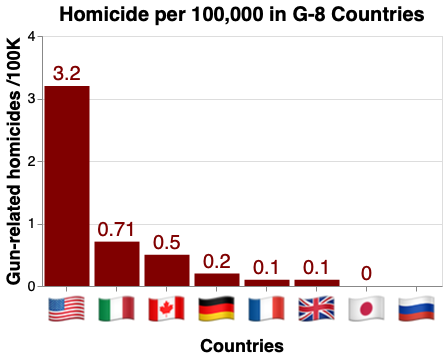

In [157]:
# The plot

bars = alt.Chart(df,
                 width=400,
                 height=250,
                 title='Homicide per 100,000 in G-8 Countries').mark_bar(
                            color='maroon').encode(
            x=alt.X('Flag',sort=alt.EncodingSortField(
                            field='Stat',
                            order='descending'),
                    title='Countries'),
            y=alt.Y('Stat',scale=alt.Scale(domain=[0,4]),
                           axis=alt.Axis(values=[0,1,2,3,4],format='0.1i'),
                           title='Gun-related homicides /100K'))
# The annotations
text = bars.mark_text(
        align='center',
        baseline='middle',
        dy=-12,
        fontSize=20,color='maroon').encode(
                text='Stat')

# Cannot figure out how to do the annotation for the source in Altair

# Best practice to allow for configure_ stuff to work
alt.layer(bars + text).configure_axis(
                        labelFontSize=14,
                        titleFontSize=18).configure_title(
                                            fontSize=20).configure_axisX(
                                                labelFontSize=40,labelAngle=0)

## Example 2 - Gun murders per 100K residents

In [192]:
countries= ["United States", "Canada", "Portugal", "Ireland", "Italy", "Belgium", "Finland", "France", "Netherlands", "Denmark", "Sweden", "Slovakia", "Austria", "New Zealand", "Australia", "Spain", "Czech Republic", "Hungry", "Germany", "United Kingdom", "Norway", "Japan", "Republic of Korea"]
murders = [3.61, 0.5, 0.48, 0.35, 0.35, 0.33, 0.26, 0.20, 0.20, 0.20, 0.19, 0.19, 0.18, 0.16,
                        0.16, 0.15, 0.12, 0.10, 0.06, 0.04, 0.04, 0.01, 0.01]

datadict = {'Countries': [c.upper() for c in countries],'Murders':murders}
df = pd.DataFrame.from_dict(datadict)

df.head()

,Countries,Murders
0,UNITED STATES,3.61
1,CANADA,0.50
2,PORTUGAL,0.48
3,IRELAND,0.35
4,ITALY,0.35


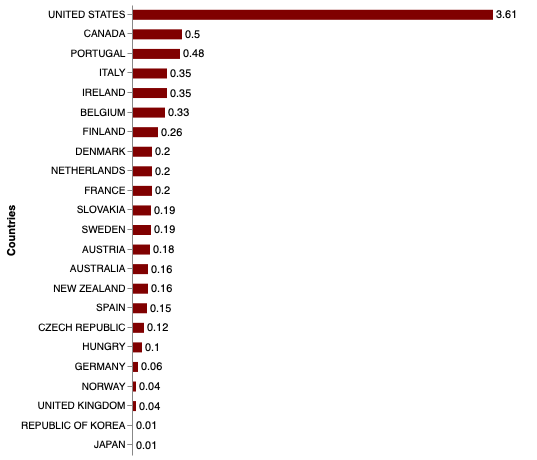

In [196]:
alt.renderers.set_embed_options(theme='default')

bars = alt.Chart(df).mark_bar(color='maroon',size=10).encode(
    x=alt.X('Murders:Q',axis=None),
    y=alt.Y("Countries:O",sort=alt.EncodingSortField(
                            field='Murders',
                            order='descending'))
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='Murders:Q'
)

alt.layer(bars + text).configure_axis(
                    grid=False
                    ).configure_view(
                    strokeWidth=0,
                    #strokeOpacity=0,
                    ).properties(height=450)

# BAH! Cannot make y axis disappear!

## Example 3 - Measles

In [85]:
import rpy2
# import rpy2's package module
import rpy2.robjects.packages as rpackages

# import R's utility package
utils = rpackages.importr('utils')

# select a mirror for R packages
utils.chooseCRANmirror(ind=1) # select the first mirror in the list

utils.install_packages('dslabs')

R[write to console]: Installing package into ‘/usr/local/lib/R/3.6/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/dslabs_0.7.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 3385043 bytes (3.2 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =

<rpy2.rinterface.NULLType object at 0x102cd34b0> [RTYPES.NILSXP]

In [86]:
# This is so cool, can get R datasets into pandas dataframes

from rpy2.robjects import r, pandas2ri
pandas2ri.activate()

from rpy2.robjects.packages import importr

dslabs = importr('dslabs')

df = rpy2.robjects.r['us_contagious_diseases']

# Filter to only look at measles
df = df[df['disease']=='Measles']
df.head()

# Do a bit of wrangling
# there might be a mistake in the original blog post, it * by 1E4, worth checking

df['Rate'] = (df['count'] / df['population'])*1E5 * 52 / df['weeks_reporting']

# Sort by State
df = df.sort_values(by='state')

df.head()

,disease,state,year,weeks_reporting,count,population,Rate
2347,Measles,Alabama,1928.0,52,8843.0,2589923.0,341.438722
2401,Measles,Alabama,1982.0,11,2.0,3942588.0,0.239806
2400,Measles,Alabama,1981.0,22,0.0,3921581.0,0.000000
2399,Measles,Alabama,1980.0,46,22.0,3893888.0,0.638682
2398,Measles,Alabama,1979.0,49,129.0,3858703.0,3.547771


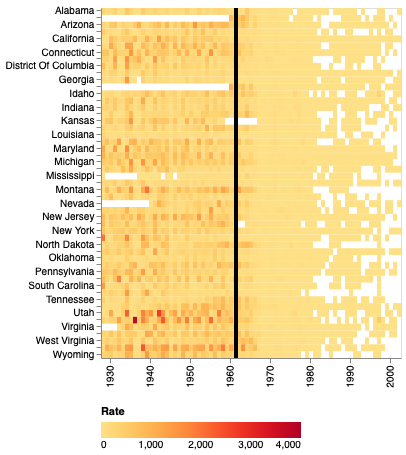

In [87]:
# Plot the heatmap

heatmap = alt.Chart(df).mark_rect().encode(x=alt.X('year:O',
                                         #scale=alt.Scale(domain=(1920,2012)),                                                   
                                         axis=alt.Axis(values=list(range(1920,2011,10))),
                                                  title=None),
                                 y=alt.Y('state:O',title=None),
                                 color=alt.Color('Rate:Q',
                                                 scale=alt.Scale(scheme="yelloworangered",
                                                                domain=[0,4000]),
                                                 legend=alt.Legend(orient='bottom')
                                                ))

# Not obvious how to set the line exactly at 1963 - x-axis is a bit weird here
line = alt.Chart(df).mark_rule().encode(
    x=alt.XValue(135),
    size=alt.SizeValue(3),
    color=alt.ColorValue("black")
)

# Text annotation needed

alt.layer(heatmap + line).transform_calculate(
        a="1975").properties(width=300,height=350).interactive()

## Example 4 - Scraping By